# BLINKIT DATA CLEANING

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_excel("Grocery.xlsx")

In [5]:
df.sample(15)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
5591,Regular,FDB36,Baking Goods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.000000,5.465,129.1626,2.3
618,Low Fat,DRD12,Soft Drinks,2020,OUT017,Tier 2,High,Supermarket Type1,0.077630,6.960,90.9146,4.6
3845,Low Fat,FDZ10,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.044248,NaN,126.2020,3.9
995,Low Fat,DRL37,Soft Drinks,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.053455,15.500,43.6770,4.4
7632,Low Fat,NCM29,Health and Hygiene,2011,OUT010,Tier 3,Medium,Grocery Store,0.029529,11.500,132.6626,4.0
5957,Low Fat,FDM40,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.159937,10.195,143.2154,4.0
3753,Regular,FDR44,Fruits and Vegetables,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.103340,6.110,131.2968,4.0
4924,Low Fat,DRD27,Dairy,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.023877,18.750,97.4042,3.4
7757,Low Fat,FDM13,Breakfast,2014,OUT013,Tier 3,High,Supermarket Type1,0.063123,6.425,131.3626,4.0
140,Regular,FDZ37,Canned,2016,OUT046,Tier 1,Small,Supermarket Type1,0.019769,8.100,88.6198,5.0


In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [9]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [56]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [11]:
df['Item Fat Content'] = df['Item Fat Content'].replace('low fat', 'Low Fat')

In [12]:
df['Item Type'].nunique()

16

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
SI=SimpleImputer(missing_values=np.nan,strategy='mean')

In [15]:
df['Item Weight']=SI.fit_transform(df[['Item Weight']])

In [16]:
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [106]:
#df['Outlet Establishment Year'].count()
df.groupby('Outlet Establishment Year').size()

Outlet Establishment Year
2011     555
2012     930
2014     932
2015     929
2016     930
2017     930
2018    1463
2020     926
2022     928
dtype: int64

In [105]:
#df['Outlet Location Type'].count()
df.groupby('Outlet Location Type').size()

Outlet Location Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
dtype: int64

# Data Visualization

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

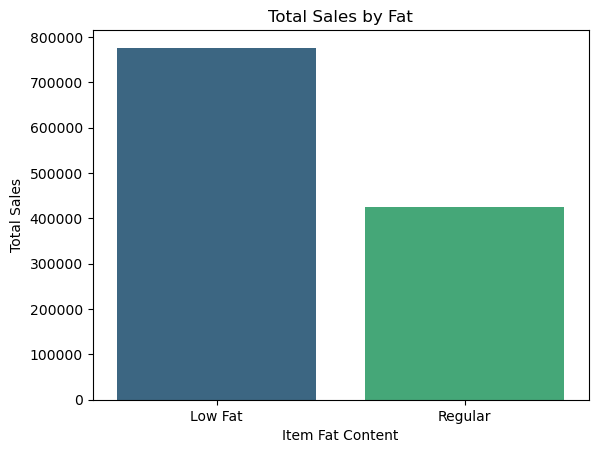

In [137]:
#Analyze the Sales of different fat content.
item_by_fat = df.groupby('Item Fat Content')['Sales'].sum().reset_index()
plt.figure()
sns.barplot(x='Item Fat Content', y='Sales', data=item_by_fat, palette='viridis')
plt.xticks()
plt.title('Total Sales by Fat')
plt.xlabel('Item Fat Content')
plt.ylabel('Total Sales')
plt.show()


#with this we can see that the people prefer the food which is less fatty.

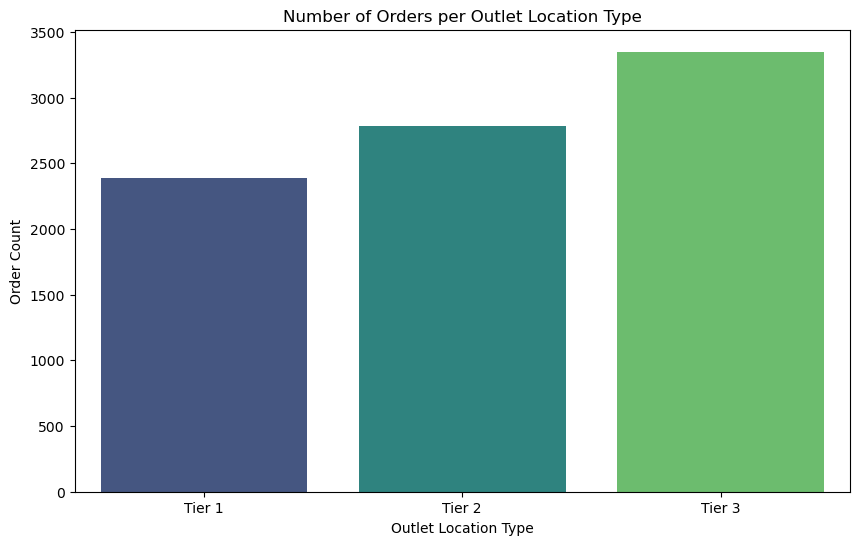

In [109]:
#outlet Location wise number of Orders.
orders_by_location = df.groupby('Outlet Location Type').size().reset_index(name='Order_Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet Location Type', y='Order_Count', data=orders_by_location, palette='viridis')
plt.title('Number of Orders per Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Order Count')
plt.show()

#It shows that tier 3 locations are prefered more over tear 2 and tear 1.

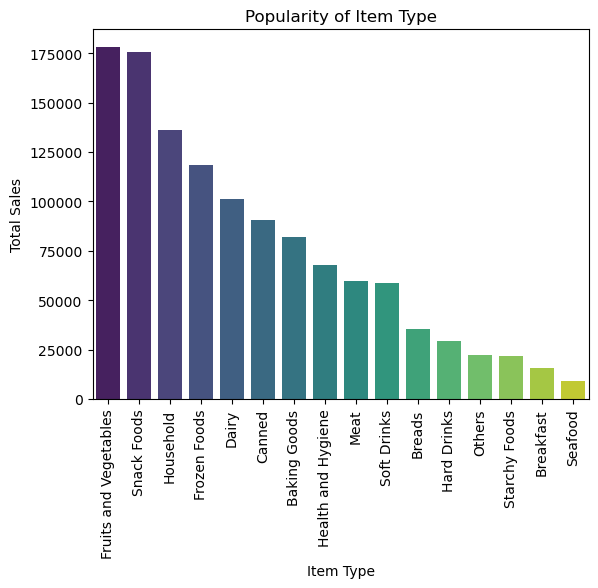

In [130]:
#Categorize items into different types to see which categories are 
#the most popular or generate the most sales.


sales_by_item = df.groupby('Item Type')['Sales'].sum().reset_index()
#sorting the values in descending order
sales_by_item = sales_by_item.sort_values(by='Sales', ascending=False)

sns.barplot(x='Item Type', y='Sales', data=sales_by_item, palette='viridis')
plt.xticks(rotation=90)
plt.title('Popularity of Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.show()

#It reflects the sales of different items sold.

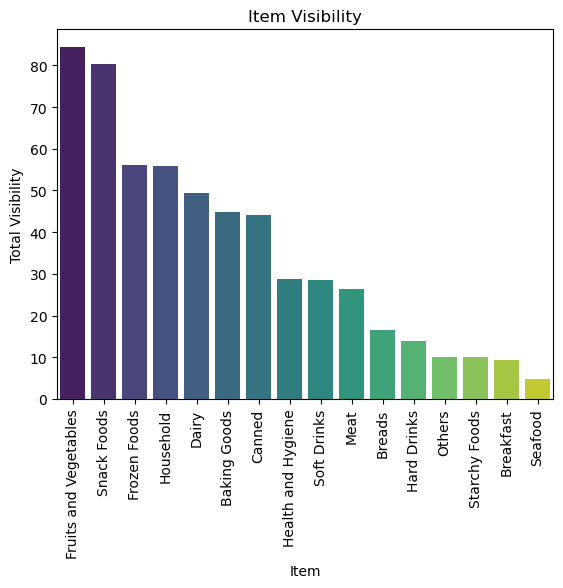

In [133]:
#checking that  Is Visibility linked with sales?
item_visibility = df.groupby('Item Type')['Item Visibility'].sum().reset_index()
item_visibility=item_visibility.sort_values(by='Item Visibility', ascending=False)
sns.barplot(x='Item Type', y='Item Visibility', data=item_visibility, palette='viridis')
plt.title('Item Visibility')
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Total Visibility')
plt.show()

#yes it is linked with sales

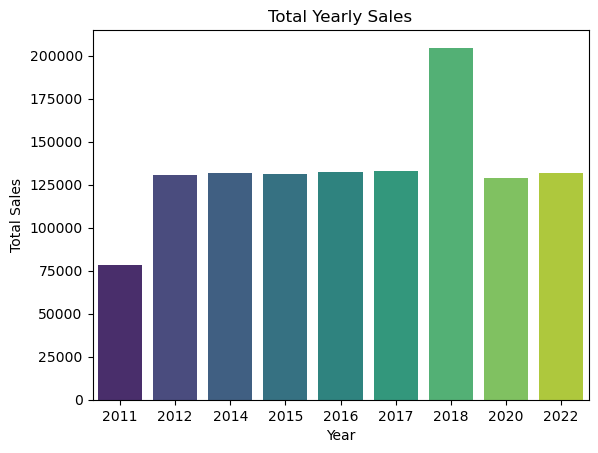

In [136]:
#Total Yearly Sales
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()
sns.barplot(x='Outlet Establishment Year', y='Sales', data=sales_by_year, palette='viridis')
plt.title('Total Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

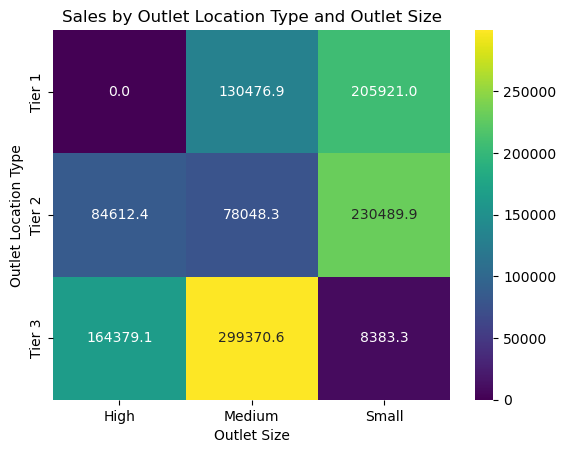

In [135]:
#Heatmap for Sales of Outlet Location and Outlet Size
pivot_table = df.pivot_table(values='Sales', index='Outlet Location Type', columns='Outlet Size', aggfunc='sum', fill_value=0)
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis')
plt.title('Sales by Outlet Location Type and Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Outlet Location Type')
plt.show()